## Setup

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

base_df = pd.read_csv("data_2.csv", index_col=0)

/tmp/ipykernel_25142/529149304.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Information about the dataset

In [2]:
base_df.head()

,revenues,ebit,industry,employees,market_cap,outstanding_shares,stock_price
0,9.894661e+10,3.368791e+10,technology,39161.284575,8.610166e+11,8.920990e+09,98.094205
1,8.989423e+10,5.421196e+10,technology,NaN,1.169811e+12,1.817962e+10,64.925081
2,8.783573e+10,4.223690e+10,technology,86764.936060,7.737738e+11,6.672160e+09,120.558326
3,7.903555e+10,2.921541e+10,technology,157253.941191,6.624233e+11,4.560541e+09,148.060378
4,7.531216e+10,3.333325e+10,technology,85562.800295,6.352531e+11,1.253771e+10,50.603175


In [3]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 749
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   revenues            750 non-null    float64
 1   ebit                750 non-null    float64
 2   industry            750 non-null    object 
 3   employees           696 non-null    float64
 4   market_cap          750 non-null    float64
 5   outstanding_shares  750 non-null    float64
 6   stock_price         750 non-null    float64
dtypes: float64(6), object(1)
memory usage: 46.9+ KB


In [4]:
base_df.describe(include="all")

,revenues,ebit,industry,employees,market_cap,outstanding_shares,stock_price
count,7.500000e+02,7.500000e+02,750,696.000000,7.500000e+02,7.500000e+02,750.000000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,technology,NaN,NaN,NaN,NaN
freq,NaN,NaN,250,NaN,NaN,NaN,NaN
mean,4.908314e+10,2.248220e+10,NaN,130891.958280,3.501470e+11,1.829055e+11,78.112721
std,2.753438e+10,1.685866e+10,NaN,120613.937372,3.027265e+11,4.427241e+12,62.281774
min,5.293376e+09,2.851677e+06,NaN,245.450064,3.198588e+07,1.783536e+05,0.007164
25%,2.325155e+10,1.379793e+09,NaN,48899.292362,2.156824e+10,5.102215e+08,28.540963
50%,4.629128e+10,2.739281e+10,NaN,104842.884653,3.481789e+11,4.013727e+09,64.545262
75%,7.340317e+10,3.541077e+10,NaN,168074.625047,5.565720e+11,1.017294e+10,113.603762


## Information About Individual Features

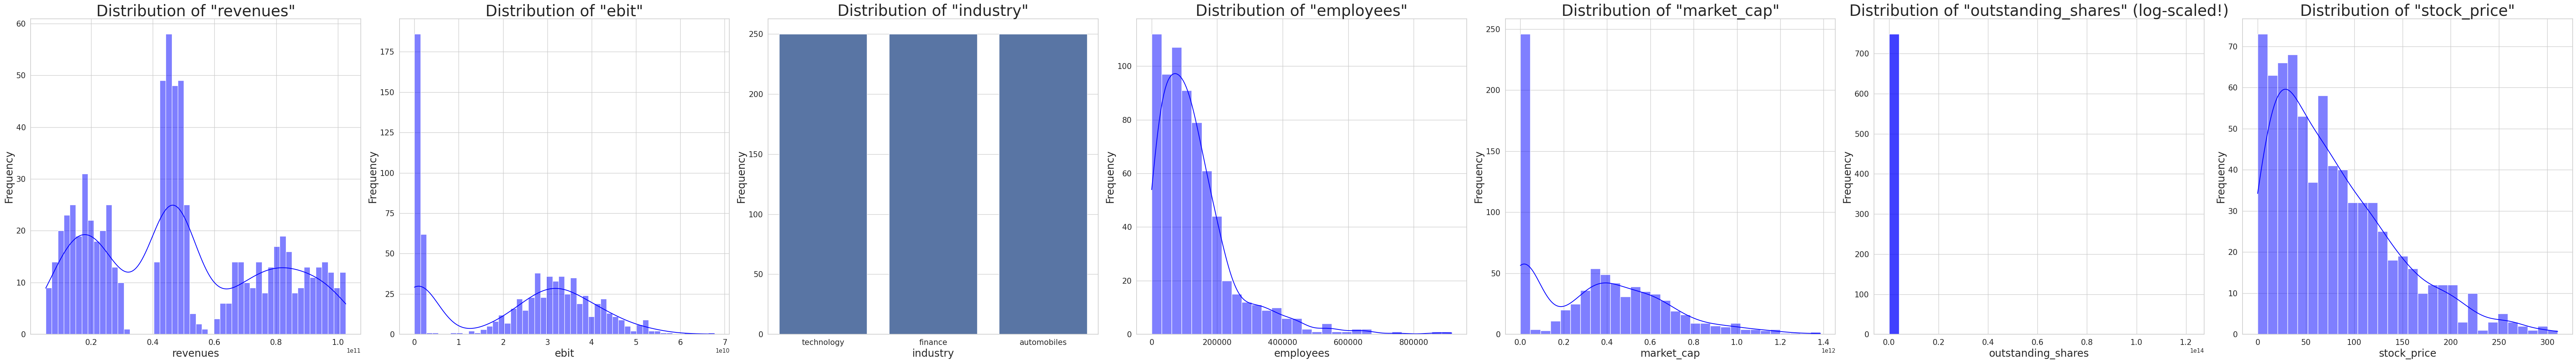

In [7]:
# Visualize the distributions of all features from the dataset in a single plot
sns.set(style="whitegrid")
plt.figure(figsize=(70, 10))

plt.subplot(1, 7, 1)
sns.histplot(base_df["revenues"], kde=True, color='blue', bins=50)
plt.title(f'Distribution of "revenues"', fontsize=30)
plt.xlabel(f'revenues', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 7, 2)
sns.histplot(base_df["ebit"], kde=True, color='blue', bins=50)
plt.title(f'Distribution of "ebit"', fontsize=30)
plt.xlabel(f'ebit', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Because industry is a categorical variable, we will use a bar plot instead of a histogram
plt.subplot(1, 7, 3)
sns.countplot(x="industry", data=base_df)
plt.title(f'Distribution of "industry"', fontsize=30)
plt.xlabel(f'industry', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 7, 4)
sns.histplot(base_df["employees"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "employees"', fontsize=30)
plt.xlabel(f'employees', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 7, 5)
sns.histplot(base_df["market_cap"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "market_cap"', fontsize=30)
plt.xlabel(f'market_cap', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 7, 6)
sns.histplot(base_df["outstanding_shares"], color='blue', bins=30)
plt.title(f'Distribution of "outstanding_shares" (log-scaled!)', fontsize=30)
plt.xlabel(f'outstanding_shares', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(1, 7, 7)
sns.histplot(base_df["stock_price"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "stock_price"', fontsize=30)
plt.xlabel(f'stock_price', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.savefig('figures/features_distributions.png')
plt.show()

## Information about combined features

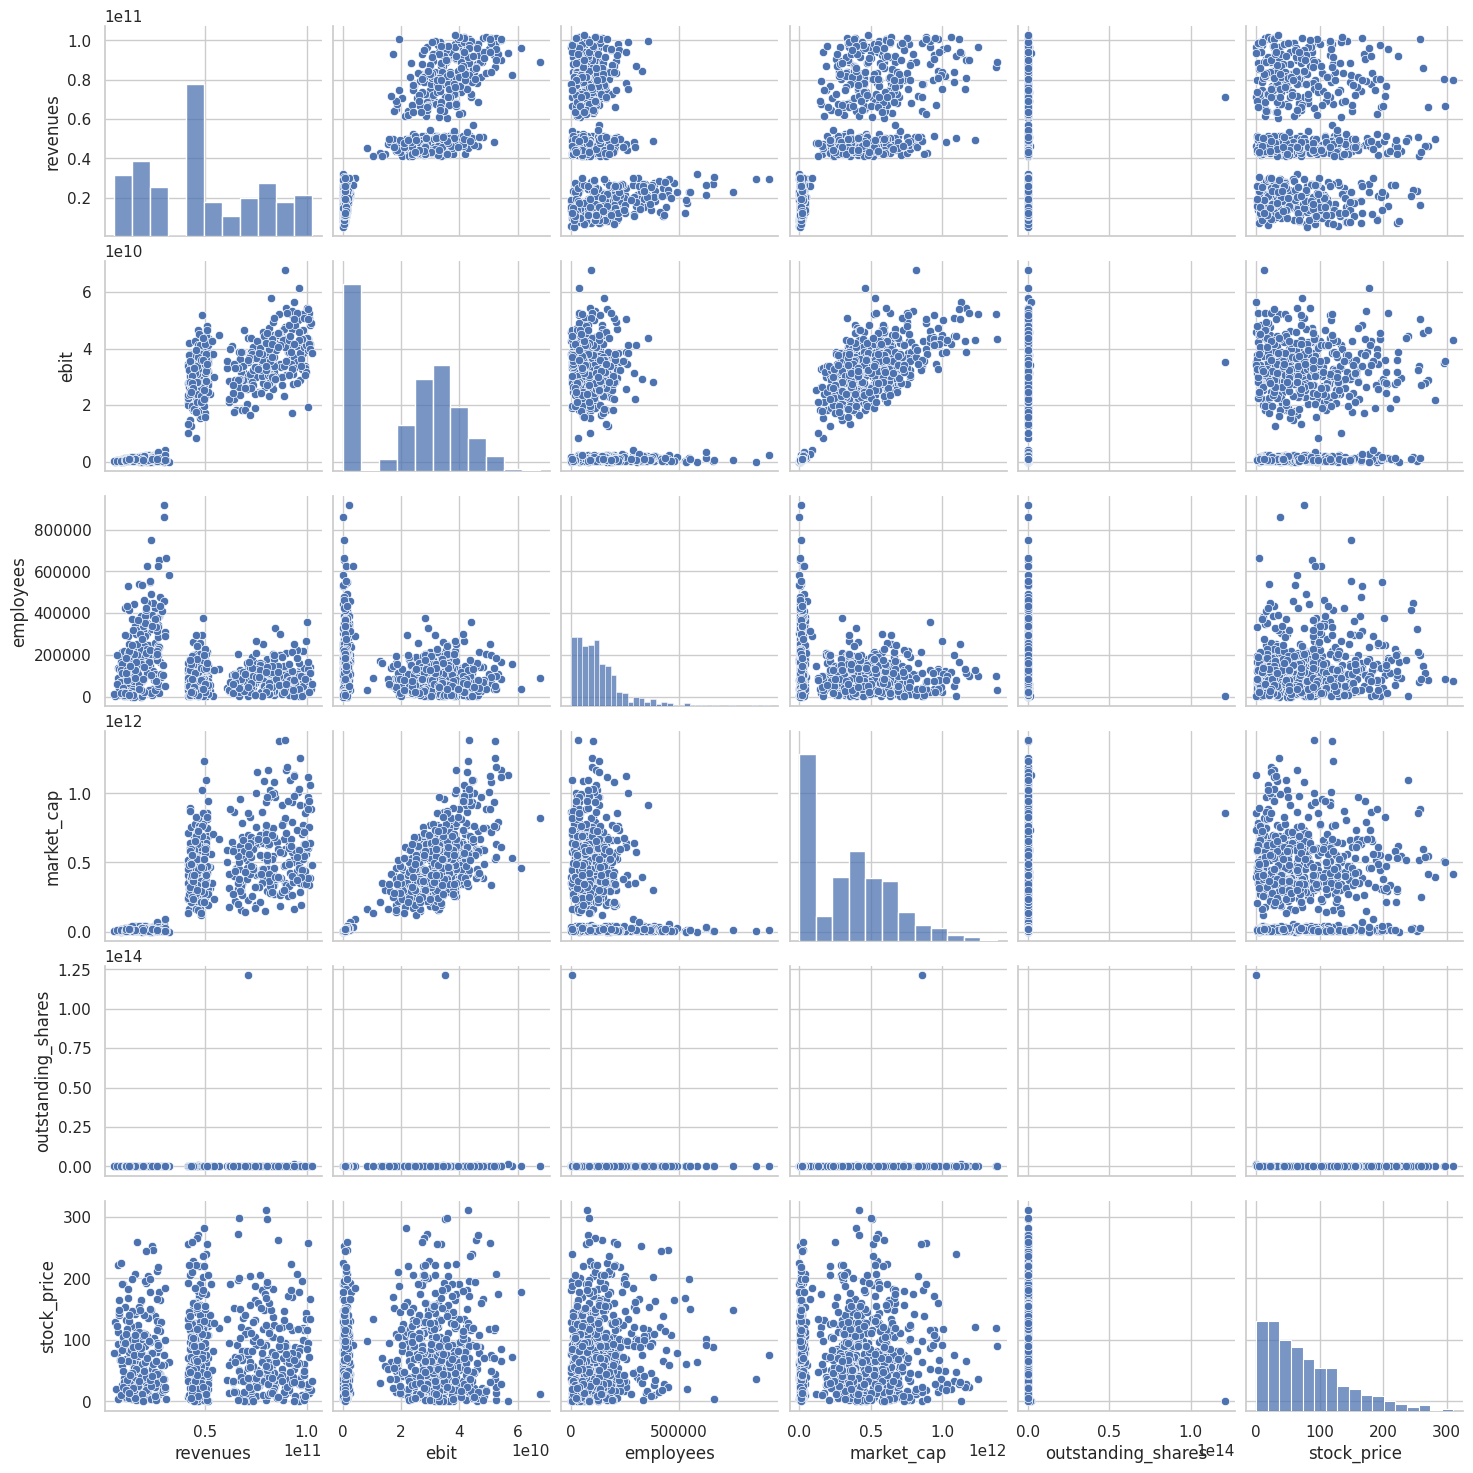

In [9]:
# Pairplot to visualize the relationship between the features
sns.pairplot(base_df)
plt.show()

We can already visually detect some clusters. Are they dependent on the `industry` feature?

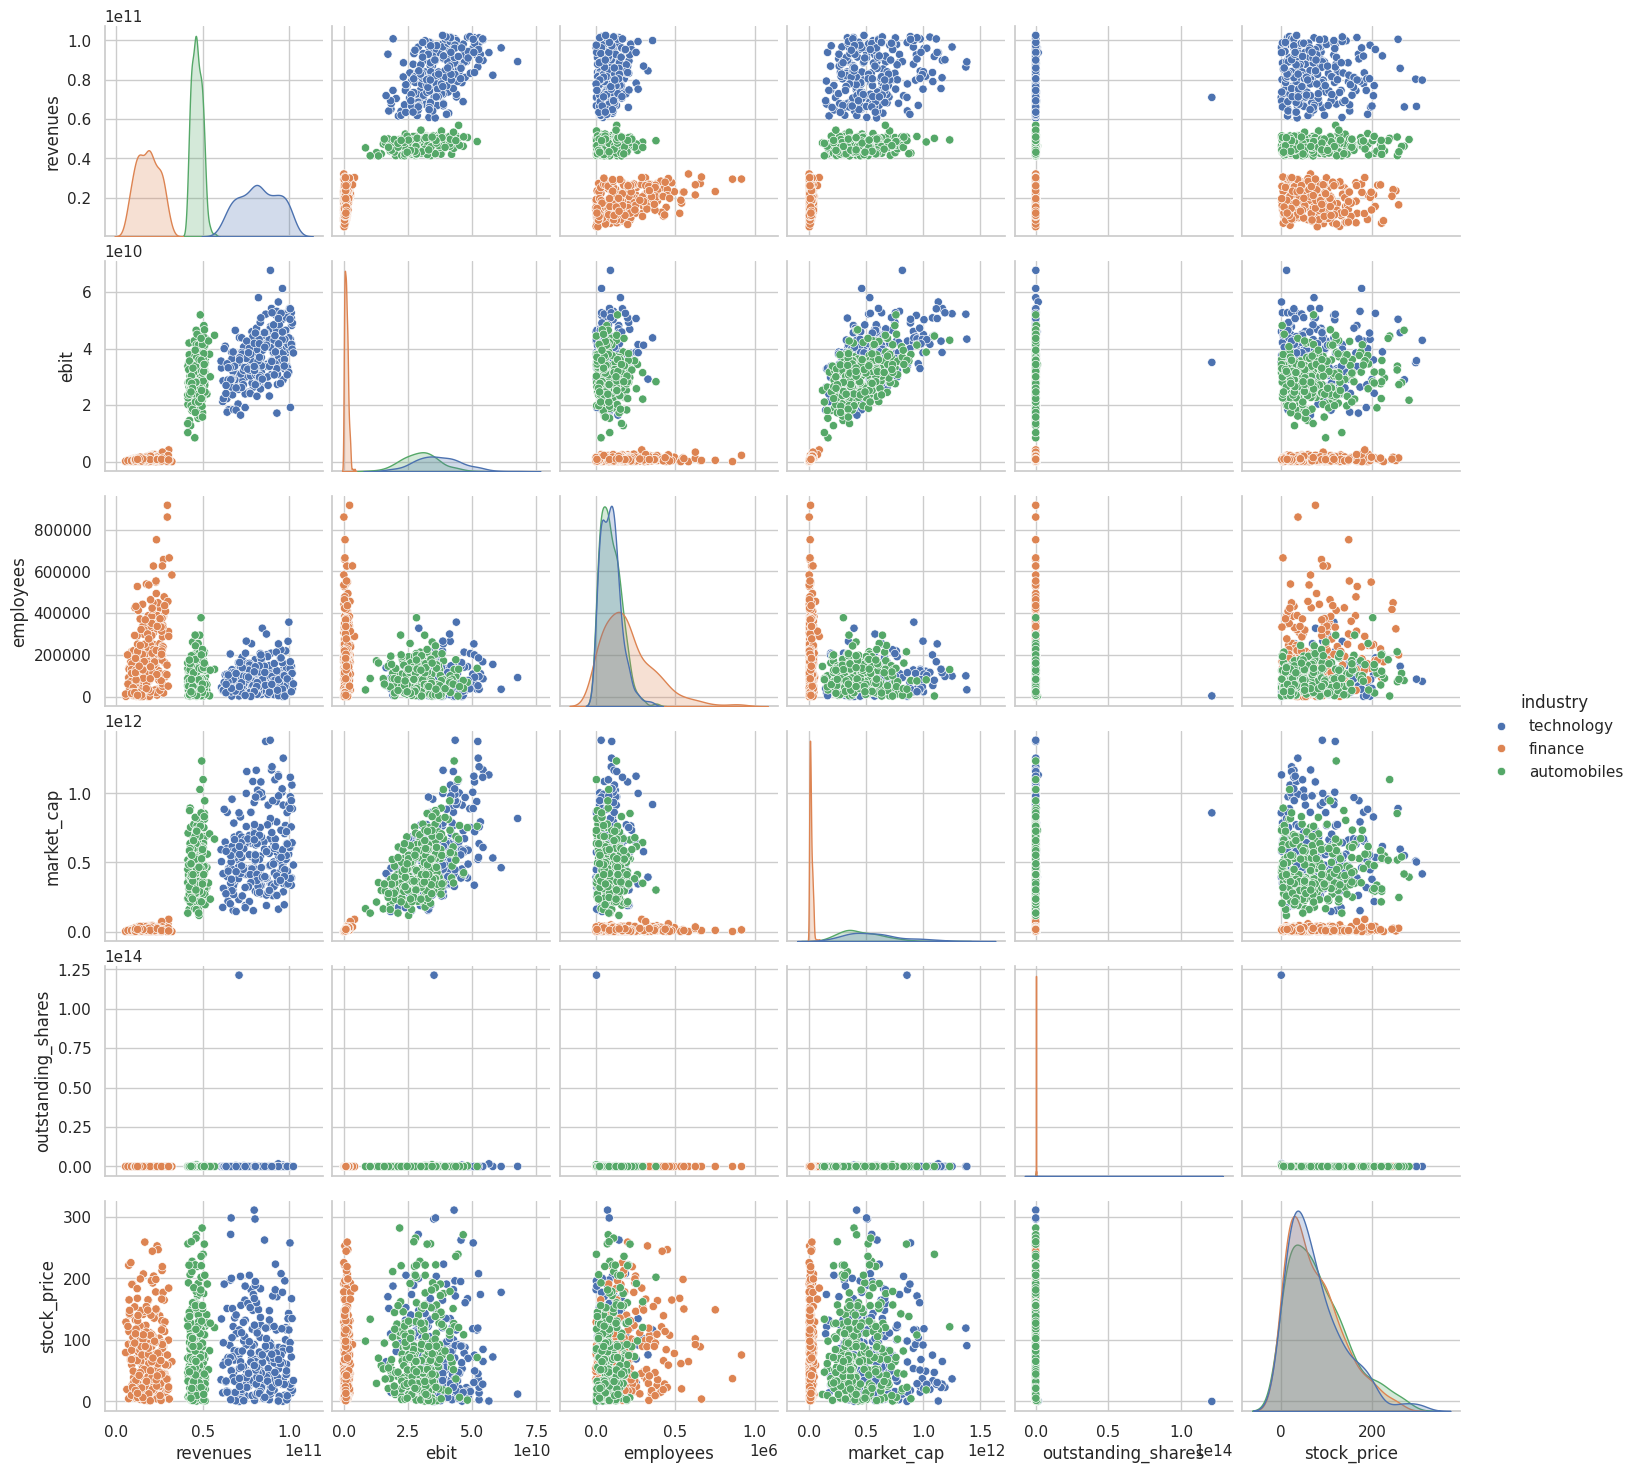

In [10]:
# Pairplot to visualize the relationship between the features
sns.pairplot(base_df, hue="industry")
plt.show()

Yes, they depend on the `industry` feature. We continue with analyzing the clusters individually.

In [11]:
# Split the dataset into three subsets according to their industry
base_df_technology = base_df[base_df["industry"] == "technology"].drop(columns=["industry"])
base_df_finance = base_df[base_df["industry"] == "finance"].drop(columns=["industry"])
base_df_automobiles = base_df[base_df["industry"] == "automobiles"].drop(columns=["industry"])

In [12]:
# Store the three dataframes in separate files
base_df_technology.to_csv("data_2_technology.csv")
base_df_finance.to_csv("data_2_finance.csv")
base_df_automobiles.to_csv("data_2_automobiles.csv")

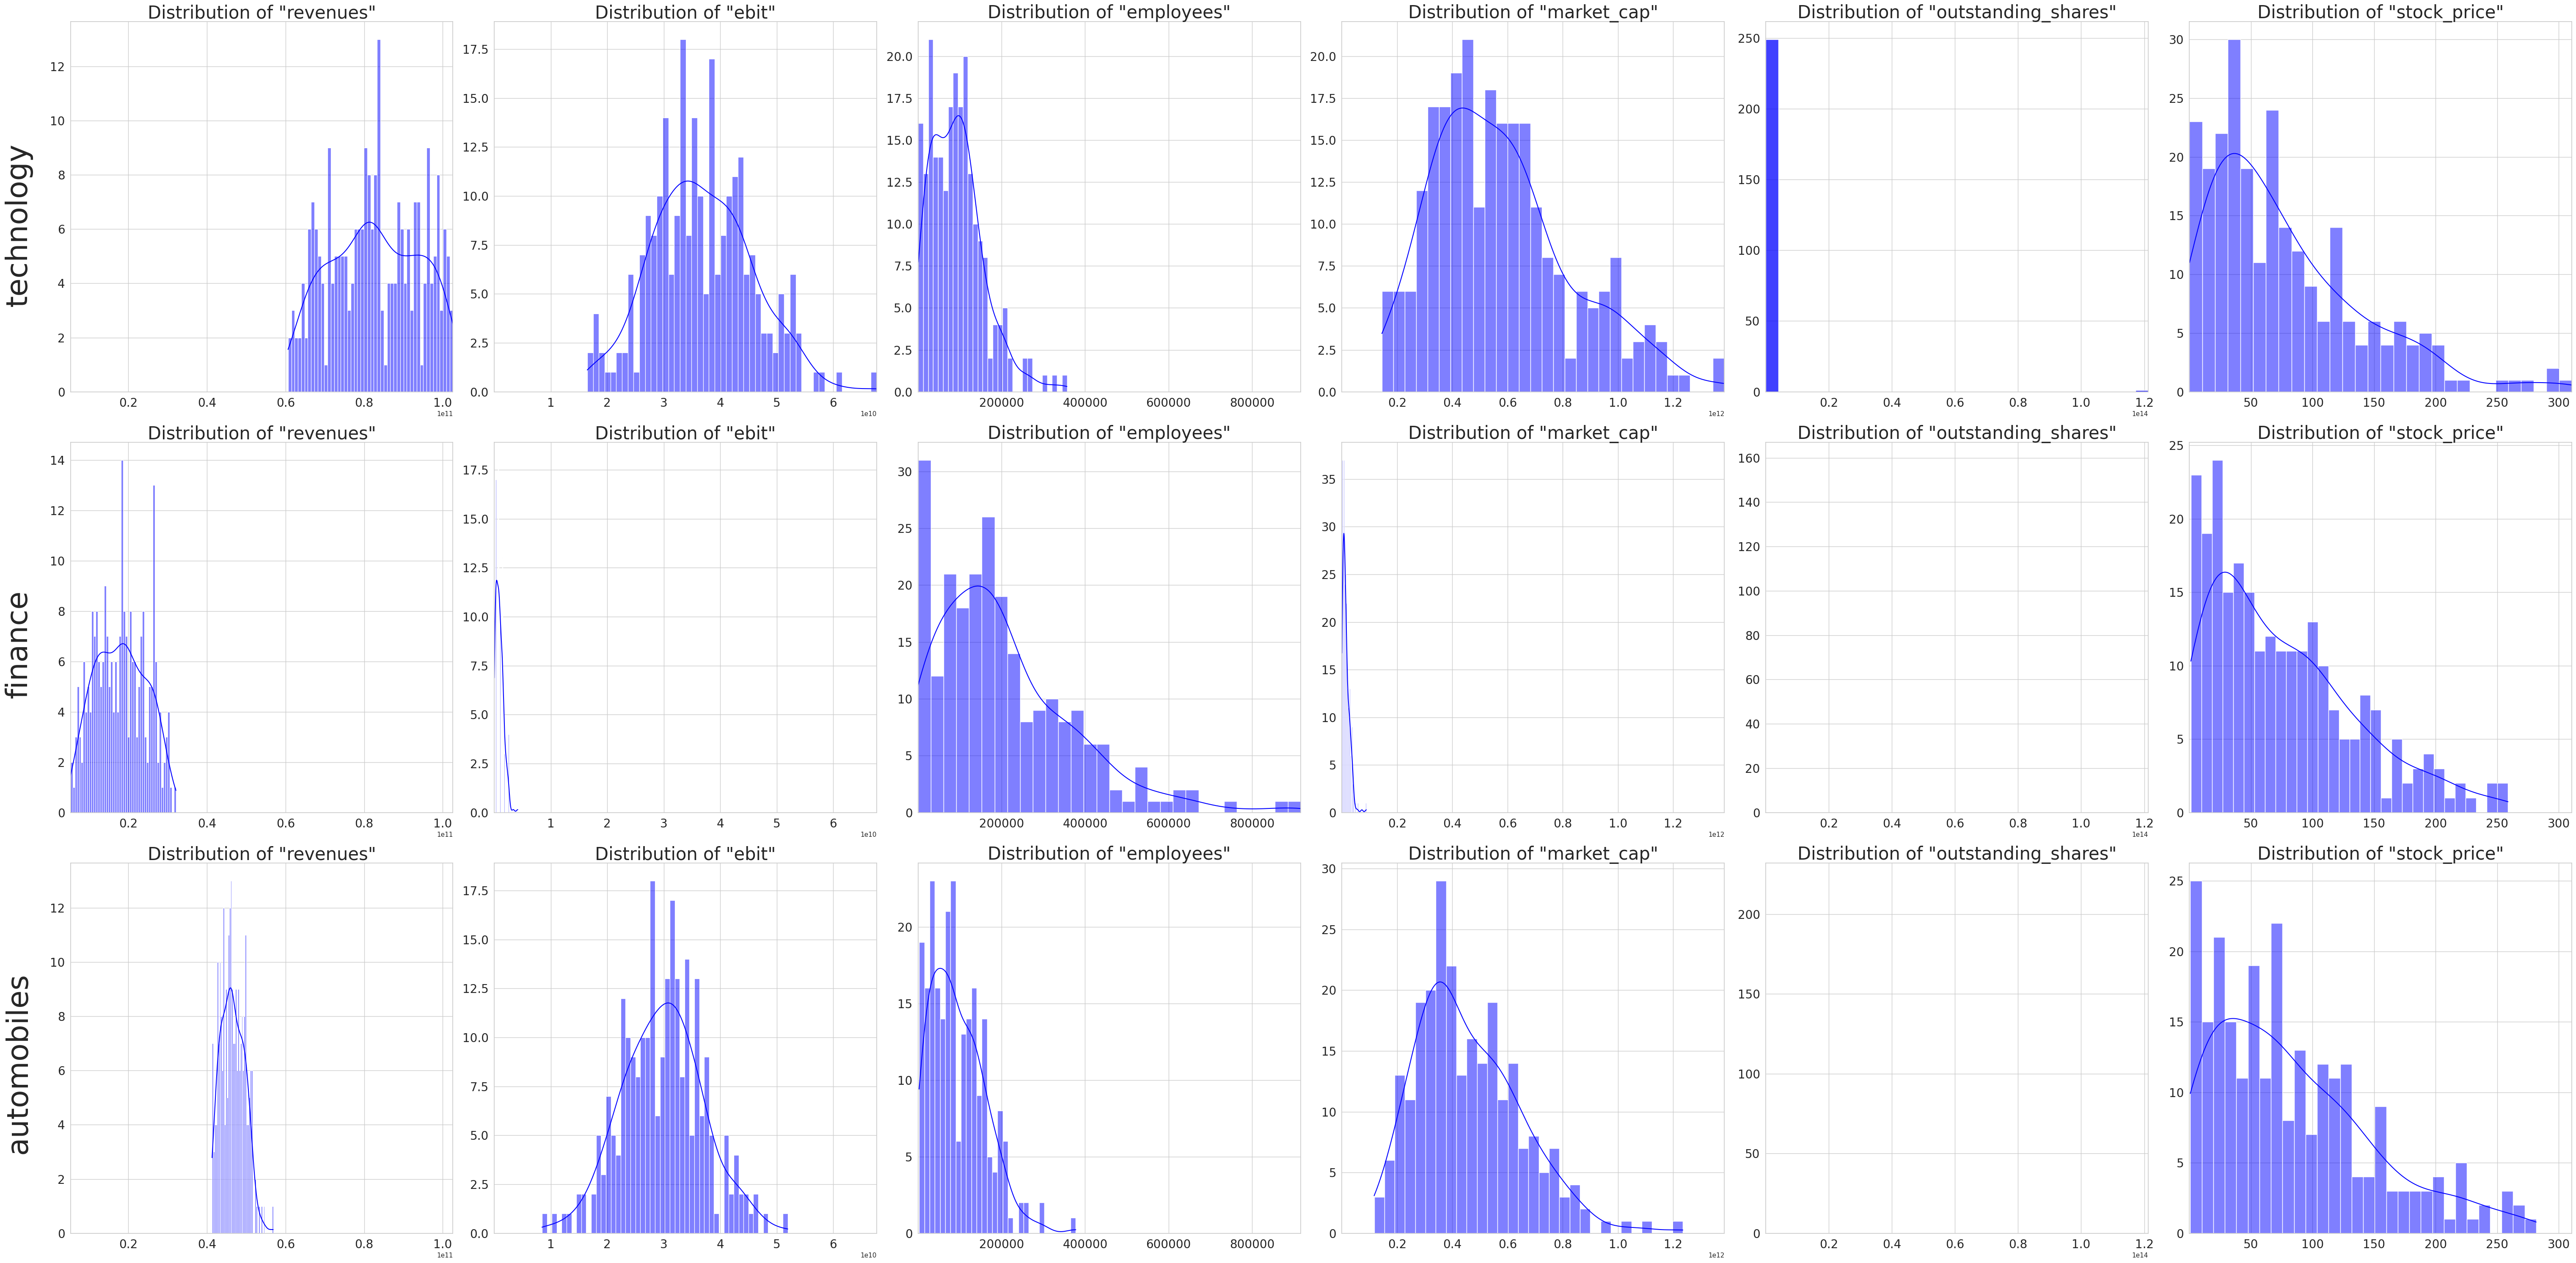

In [25]:
# Visualize the distributions of all features from the three dataset in a single plot
sns.set(style="whitegrid")
fig = plt.figure(figsize=(60, 30))


plt.subplot(3, 6, 1)
sns.histplot(base_df_technology["revenues"], kde=True, color='blue', bins=50)
plt.title(f'Distribution of "revenues"', fontsize=30)
# plt.xlabel(f'revenues', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["revenues"].min(), base_df["revenues"].max())

plt.subplot(3, 6, 2)
sns.histplot(base_df_technology["ebit"], kde=True, color='blue', bins=50)
plt.title(f'Distribution of "ebit"', fontsize=30)
# plt.xlabel(f'ebit', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["ebit"].min(), base_df["ebit"].max())

plt.subplot(3, 6, 3)
sns.histplot(base_df_technology["employees"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "employees"', fontsize=30)
# plt.xlabel(f'employees', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["employees"].min(), base_df["employees"].max())

plt.subplot(3, 6, 4)
sns.histplot(base_df_technology["market_cap"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "market_cap"', fontsize=30)
# plt.xlabel(f'market_cap', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["market_cap"].min(), base_df["market_cap"].max())

plt.subplot(3, 6, 5)
sns.histplot(base_df_technology["outstanding_shares"], color='blue', bins=30)
plt.title(f'Distribution of "outstanding_shares"', fontsize=30)
# plt.xlabel(f'outstanding_shares', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["outstanding_shares"].min(), base_df["outstanding_shares"].max())

plt.subplot(3, 6, 6)
sns.histplot(base_df_technology["stock_price"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "stock_price"', fontsize=30)
# plt.xlabel(f'stock_price', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["stock_price"].min(), base_df["stock_price"].max())


plt.subplot(3, 6, 7)
sns.histplot(base_df_finance["revenues"], kde=True, color='blue', bins=50)
plt.title(f'Distribution of "revenues"', fontsize=30)
# plt.xlabel(f'revenues', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["revenues"].min(), base_df["revenues"].max())

plt.subplot(3, 6, 8)
sns.histplot(base_df_finance["ebit"], kde=True, color='blue', bins=50)
plt.title(f'Distribution of "ebit"', fontsize=30)
# plt.xlabel(f'ebit', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["ebit"].min(), base_df["ebit"].max())

plt.subplot(3, 6, 9)
sns.histplot(base_df_finance["employees"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "employees"', fontsize=30)
# plt.xlabel(f'employees', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["employees"].min(), base_df["employees"].max())

plt.subplot(3, 6, 10)
sns.histplot(base_df_finance["market_cap"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "market_cap"', fontsize=30)
# plt.xlabel(f'market_cap', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["market_cap"].min(), base_df["market_cap"].max())

plt.subplot(3, 6, 11)
sns.histplot(base_df_finance["outstanding_shares"], color='blue', bins=30)
plt.title(f'Distribution of "outstanding_shares"', fontsize=30)
# plt.xlabel(f'outstanding_shares', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["outstanding_shares"].min(), base_df["outstanding_shares"].max())

plt.subplot(3, 6, 12)
sns.histplot(base_df_finance["stock_price"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "stock_price"', fontsize=30)
# plt.xlabel(f'stock_price', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["stock_price"].min(), base_df["stock_price"].max())


plt.subplot(3, 6, 13)
sns.histplot(base_df_automobiles["revenues"], kde=True, color='blue', bins=50)
plt.title(f'Distribution of "revenues"', fontsize=30)
# plt.xlabel(f'revenues', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["revenues"].min(), base_df["revenues"].max())

plt.subplot(3, 6, 14)
sns.histplot(base_df_automobiles["ebit"], kde=True, color='blue', bins=50)
plt.title(f'Distribution of "ebit"', fontsize=30)
# plt.xlabel(f'ebit', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["ebit"].min(), base_df["ebit"].max())

plt.subplot(3, 6, 15)
sns.histplot(base_df_automobiles["employees"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "employees"', fontsize=30)
# plt.xlabel(f'employees', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["employees"].min(), base_df["employees"].max())

plt.subplot(3, 6, 16)
sns.histplot(base_df_automobiles["market_cap"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "market_cap"', fontsize=30)
# plt.xlabel(f'market_cap', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["market_cap"].min(), base_df["market_cap"].max())

plt.subplot(3, 6, 17)
sns.histplot(base_df_automobiles["outstanding_shares"], color='blue', bins=30)
plt.title(f'Distribution of "outstanding_shares"', fontsize=30)
# plt.xlabel(f'outstanding_shares', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["outstanding_shares"].min(), base_df["outstanding_shares"].max())

plt.subplot(3, 6, 18)
sns.histplot(base_df_automobiles["stock_price"], kde=True, color='blue', bins=30)
plt.title(f'Distribution of "stock_price"', fontsize=30)
# plt.xlabel(f'stock_price', fontsize=20)
# plt.ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(base_df["stock_price"].min(), base_df["stock_price"].max())

# Turn of the x and y labels for all subplots
for i in range(1, 19):
    plt.subplot(3, 6, i)
    plt.xlabel('')
    plt.ylabel('')

fig.text(-0.015, 0.82, 'technology', fontsize=50, va='center', rotation='vertical')
fig.text(-0.015, 0.49, 'finance', fontsize=50, va='center', rotation='vertical')
fig.text(-0.015, 0.16, 'automobiles', fontsize=50, va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('figures/features_distributions.png')
plt.show()

In [26]:
technology_corr = base_df_technology.corr()
technology_corr

,revenues,ebit,employees,market_cap,outstanding_shares,stock_price
revenues,1.000000,0.503995,0.135962,0.212457,-0.063523,-0.057857
ebit,0.503995,1.000000,0.074762,0.509429,-0.008477,-0.062605
employees,0.135962,0.074762,1.000000,0.071422,-0.094972,0.025991
market_cap,0.212457,0.509429,0.071422,1.000000,0.073909,-0.074350
outstanding_shares,-0.063523,-0.008477,-0.094972,0.073909,1.000000,-0.081999
stock_price,-0.057857,-0.062605,0.025991,-0.074350,-0.081999,1.000000


In the technology sector, `revenue` correlates most with `ebit`.
`ebit` correlates with `market_cap`.
`employees`, `outstanding_shares` and `stock_price` are uncorrelated to the other variables.

In [27]:
finance_corr = base_df_finance.corr()
finance_corr

,revenues,ebit,employees,market_cap,outstanding_shares,stock_price
revenues,1.000000,0.434410,0.426839,0.369128,0.131152,-0.014727
ebit,0.434410,1.000000,0.092244,0.856227,0.150138,0.090781
employees,0.426839,0.092244,1.000000,0.019471,-0.054616,0.165069
market_cap,0.369128,0.856227,0.019471,1.000000,0.208063,0.058743
outstanding_shares,0.131152,0.150138,-0.054616,0.208063,1.000000,-0.425121
stock_price,-0.014727,0.090781,0.165069,0.058743,-0.425121,1.000000


In the finance sector, `revenue` correlates with `ebit`, as well as `employees` and also slightly with `market_cap`.
`ebit` correlates significantly with `market_cap`.
`outstanding_shares` and `stock_price` are uncorrelated to the other variables.

In [28]:
automobiles_corr = base_df_automobiles.corr()
automobiles_corr

,revenues,ebit,employees,market_cap,outstanding_shares,stock_price
revenues,1.000000,0.318148,0.082475,0.123903,0.058177,0.034411
ebit,0.318148,1.000000,-0.064377,0.520828,0.112189,0.101269
employees,0.082475,-0.064377,1.000000,-0.096833,-0.106260,0.158831
market_cap,0.123903,0.520828,-0.096833,1.000000,0.177575,0.040734
outstanding_shares,0.058177,0.112189,-0.106260,0.177575,1.000000,-0.309597
stock_price,0.034411,0.101269,0.158831,0.040734,-0.309597,1.000000


In the automobiles sector, `revenue` correlates slightly with `ebit`.
`ebit` correlates with `market_cap`.
`employees`, `outstanding_shares` and `stock_price` are uncorrelated to the other variables.

We observe different patterns per industry, thus it made sense to analyze them separately.